In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from functools import reduce
from matplotlib.colors import ListedColormap

### Load Data

In [45]:
#Read in csv files of 3 datasets 
obesity = pd.read_csv('Data/obesity.csv')
anxiety = pd.read_csv('Data/anxiety_attacks.csv')
panic_attacks = pd.read_csv('Data/panic_attacks.csv')

# View the head and first 5 rows of each dataframe 
# Create a variable to include a list of all dataframes recently imported
dataframes = [obesity,anxiety,panic_attacks]
# Display only the head of each dataframe separately
for df in dataframes:
    display(df.head())

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


### Clean the Data

In [46]:
#check for missing values
'''
Panic attack appears to have missing data.. we should do something about that..
'''
print(obesity.isnull().any().any())
print(anxiety.isnull().any().any())
print(panic_attacks.isnull().any().any())

#drop rows where values are missing/unwanted
'''
Dropping any rows that have missing data from the panic attacks data set. 
Also removed any rows in obesity labeled as Normal Weight or Insufficient Weight as I am not looking at those for this project.
'''
o_dropped_values = obesity[~obesity.Obesity.isin(['Normal_Weight', 'Insufficient_Weight'])] 
p_dropped_values= panic_attacks.dropna()
print(p_dropped_values.isnull().any().any())

#Dropped columns Variables
'''
I only need specific columns for what I am looking at. I want to remove any 'extra' columns. 
Created variables for all of the columns I want to drop from three data sets.
'''
o_columns_dropped = ['Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'CH2O', 'SCC', 'TUE', 'MTRANS', 'Obesity']
a_columns_dropped = ['Occupation', 'Sleep Hours','Caffeine Intake (mg/day)', 
        'Family History of Anxiety', 'Stress Level (1-10)',
        'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
        'Sweating Level (1-5)', 'Dizziness', 'Medication',
        'Therapy Sessions (per month)', 'Recent Major Life Event',
        'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)']
p_columns_dropped = ['Panic_Attack_Frequency', 'Duration_Minutes','Trigger', 
        'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness',
        'Chest_Pain', 'Trembling', 'Medical_History', 'Medication',
        'Caffeine_Intake', 'Sleep_Hours',
        'Therapy', 'Panic_Score']

#Dropping columns and renaming kept columns
'''
Actual process of dropping the columns from the variables above. 
Renamed the columns I wanted to keep as well to make all lists consistent.
Added an ID column to obsesity data set
'''
o_cleaned = o_dropped_values.drop(o_columns_dropped, axis=1).rename(columns={
    'Gender': 'Obesity Genders', 
    'Age': "Obesity Ages", 
    'SMOKE': 'Smokers with Obesity',
    'FAF': 'Obesity_Physical Activity', 
    'CALC': 'Obesity_Alcohol Consumption'
    })
o_cleaned['ID']=o_cleaned.index
print(o_cleaned.columns)

a_cleaned = anxiety.drop(a_columns_dropped, axis=1).rename(columns={
    'Age': 'Anxiety Ages', 
    'Gender': 'Anxiety Genders', 
    'Physical Activity (hrs/week)': 'Anxiety_Physical Activity', 
    'Alcohol Consumption (drinks/week)': 'Anxiety_Alcohol Consumption', 
    'Smoking': 'Smokers with Anxiety'
    })
print(a_cleaned.columns)

p_cleaned = p_dropped_values.drop(p_columns_dropped, axis=1).rename(columns={
    'Age': 'Panic Ages', 
    'Gender': 'Panic Genders', 
    'Exercise_Frequency': 'Panic Attack_Physical Activity', 
    'Alcohol_Consumption': 'Panic Attack_Alcohol Consumption', 
    'Smoking': 'Smokers with Panic Attacks'
    })
print(p_cleaned.columns)

False
False
True
False
Index(['Obesity Genders', 'Obesity Ages', 'Smokers with Obesity',
       'Obesity_Physical Activity', 'Obesity_Alcohol Consumption', 'ID'],
      dtype='object')
Index(['ID', 'Anxiety Ages', 'Anxiety Genders', 'Anxiety_Physical Activity',
       'Anxiety_Alcohol Consumption', 'Smokers with Anxiety'],
      dtype='object')
Index(['ID', 'Panic Ages', 'Panic Genders', 'Panic Attack_Physical Activity',
       'Panic Attack_Alcohol Consumption', 'Smokers with Panic Attacks'],
      dtype='object')


In [47]:
dfs = [a_cleaned, p_cleaned, o_cleaned]
merged_data = reduce(lambda left, right: pd.merge(left, right, on='ID', how='right'), dfs)


merged_data

,ID,Anxiety Ages,Anxiety Genders,Anxiety_Physical Activity,Anxiety_Alcohol Consumption,Smokers with Anxiety,Panic Ages,Panic Genders,Panic Attack_Physical Activity,Panic Attack_Alcohol Consumption,Smokers with Panic Attacks,Obesity Genders,Obesity Ages,Smokers with Obesity,Obesity_Physical Activity,Obesity_Alcohol Consumption
0,3,32.0,Female,1.0,14.0,No,32.0,Female,0.0,8.0,No,Male,27.000000,no,2.000000,Frequently
1,4,60.0,Male,3.7,16.0,No,60.0,Male,3.0,8.0,No,Male,22.000000,no,0.000000,Sometimes
2,10,28.0,Female,9.3,18.0,No,28.0,Female,6.0,2.0,No,Male,26.000000,no,2.000000,Sometimes
3,11,28.0,Male,3.3,18.0,Yes,28.0,Female,4.0,9.0,No,Female,21.000000,no,2.000000,Sometimes
4,13,53.0,Male,6.8,18.0,Yes,53.0,Female,2.0,4.0,No,Male,41.000000,no,2.000000,Frequently
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,20.976842,no,1.676269,Sometimes
1548,2107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,21.982942,no,1.341390,Sometimes
1549,2108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,22.524036,no,1.414209,Sometimes
1550,2109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,24.361936,no,1.139107,Sometimes


### Data for Charts/ Graphs

In [65]:
#Data for Genders
'''
Added the three columns I wanted to analyze for genders. 
Counted by gender, and then realized there were additional genders including 'Non-binary' and 'Other'
Added groupby to combined these 'Other' data and renamed the data. 
Then I renamed the columns to make the graphs easier to read further down.
'''
gender_data = merged_data[
    ['Anxiety Genders', 'Panic Genders', 'Obesity Genders']].apply(pd.Series.value_counts).rename(index = {'Non-binary':'Other'}).groupby(level=0).sum().rename(columns={
    'Anxiety Genders': 'Anxiety',
    'Panic Genders': 'Panic Attacks',
    'Obesity Genders': 'Obesity'
})




### Graphs/ Charts

(array([0, 1, 2]),
 [Text(0, 0, 'Anxiety'), Text(1, 0, 'Panic Attacks'), Text(2, 0, 'Obesity')])

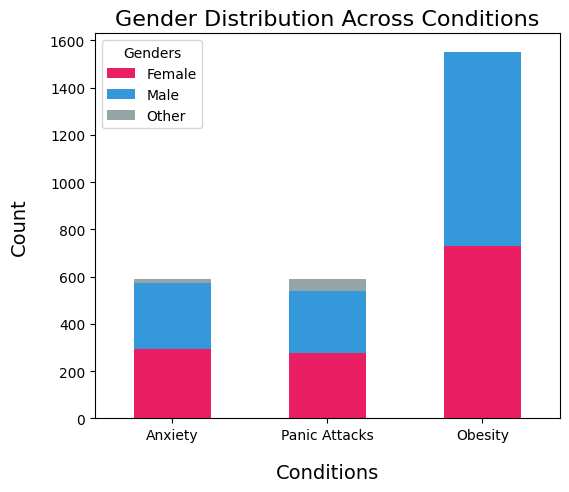

In [ ]:
#Create Stacked Bar Chart for Gender Analysis
'''
Created a variable as I wanted specific colors for the chart. Included the color codes that I wanted
created a variable for the chart. .T switches the rows and columns to make the chart easier to read. 
Adjusted the size to my desire and pulled the custom_cmap variable for my colors. 
Then I created the labels, title, legend, and rotated the labels as they were originally vertical
I changed the fontsize and the spacing between the labels and the tick names to make the chart easier to view
'''
custom_cmap = ListedColormap(["#e91e63", "#3498db", "#95a5a6"])
Gender_Chart = gender_data.T.plot(kind='bar', stacked=True, figsize=(6, 5), color=custom_cmap.colors)

#Add Labels, title, legend, and rotate labels horizontal
plt.xlabel("Conditions", fontsize=14, labelpad=15)
plt.ylabel("Count", fontsize=14, labelpad=15)
plt.title("Gender Distribution Across Conditions", fontsize=16)
plt.legend(title="Genders")
plt.xticks(rotation=0)